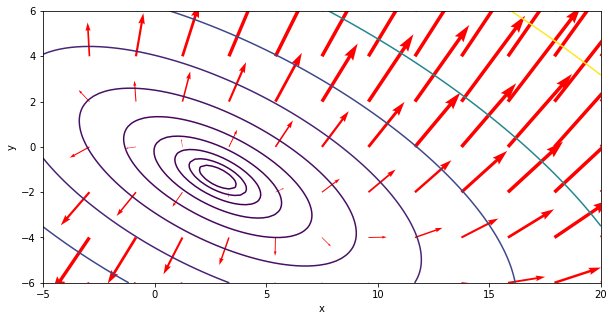

In [1]:
#그레디언트 그리기
import numpy as np 
import matplotlib.pyplot as plt

def f(x,y): # 계산하고자 하는 식
  return 2*x**2 + 4*x*y + 5*y**2 - 6*x + 2*y + 10 

def dx(x,y): # x에 대해 편미분
  return 4*x + 4*y - 6

def dy(x,y): # y에 대해 편미분
  return 4*x + 10*y + 2

xi = np.linspace(-5, 20, 100) # x축 구간
yi = np.linspace(-6, 6, 100) # y축 구간
X, Y = np.meshgrid(xi, yi) # 메시그리드 사용 (격자 만들기)
Z = f(X,Y) # x,y 는 위치를 나타내고 z는 그때의 함수값

xj = np.linspace(-5, 20, 13) 
yj = np.linspace(-6, 6, 7) 
X1, Y1 = np.meshgrid(xj, yj) 
Dx = dx(X1, Y1) # 편미분 저장
Dy = dy(X1, Y1) # 편미분 저장

plt.figure(figsize=(10,5)) 
plt.contour(X, Y, Z, levels=np.logspace(0,3,10)) # 등고선 만들기
plt.quiver(X1, Y1, Dx, Dy, color='red',scale=500, minshaft=4) # 그레디언트 나타내기
plt.xlabel('x') 
plt.ylabel('y') 
plt.show()

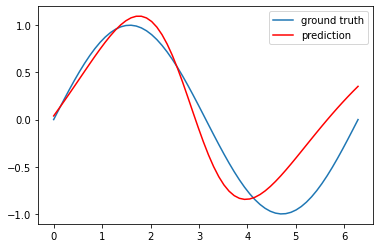

In [7]:
#MLP 학습
import numpy as np 
import matplotlib.pyplot as plt 

class MLP: 
  def __init__(self, hidden_node=3):
    # 가중치 만들기. 평균이 0이고 표준편차가 1인 값을 무작위로
    self.input_node = 1;  self.hidden_node = hidden_node; self.output_node = 1 # 입력값 1개, 히든 레이어 3개, 출력값 1개
    self.w1 = np.random.rand(self.hidden_node, self.input_node) # 입력층과 레이어 사이의 가중치
    self.b1 = np.random.rand(self.hidden_node, 1)  # 입력층과 레이어 사이의 b값
    self.w2 = np.random.rand(self.output_node, self.hidden_node) # 레이어와 출력층 사이의 가중치
    self.b2 = np.random.rand(self.output_node, 1) # 레이어와 출력층 사이의 b값
  def sigmoid(self, x): # 활성화 함수로 시그모이드 사용
    return 1/(1+np.exp(-x))
  def d_sigmoid(self, x): # 시그모이드를 편미분
    return self.sigmoid(x)*(1-self.sigmoid(x)) 
  def train(self, train_x, train_y, alpha=0.1, max_iter=500): # 학습
    np.random.seed(0) 
    input_node = self.input_node; hidden_node = self.hidden_node # 입력노드 개수, 히든노드 개수
    output_node = self.output_node; alpha = alpha; max_iter = max_iter # 출력노드 개수, 알파는 학습율, max_iter는 반복 횟수
    for iter in range(1, max_iter): 
      for i in range(n_train):
        z1 = np.dot(self.w1, train_x[i].reshape(1,1))+self.b1; a1 = self.sigmoid(z1); # 내적 # 시그모이드 적용
        z2 = np.dot(self.w2, a1)+self.b2; y_hat = z2; y_hat_list[i] = y_hat # 내적 
        e = 0.5*(train_y[i] - y_hat)**2; dy = -(train_y[i] - y_hat) # 오차
        dz2 = 1; dw2 = a1.T 
        delta_w2 = dy*dz2*dw2; delta_b2 = dy*dz2; # 편미분에 해당하는 값 계산
        da1 = self.w2.T; dz1 = self.d_sigmoid(z1); dw1 = train_x[i].T 
        delta_w1 = dy*dz2*da1*dz1*dw1; delta_b1 = dy*dz2*da1*dz1  # 편미분에 해당하는 값 계산
        self.w2 -= alpha*delta_w2; self.b2 -= alpha*delta_b2 # 학습율*편미분을 뺀다
        self.w1 -= alpha*delta_w1; self.b1 -= alpha *delta_b1 # 학습율*편미분을 뺀다


  def predict(self, test_x): 
      for i in range(n_test):
        z1 = np.dot(self.w1, test_x[i].reshape(1,1))+self.b1 # 첫번째 은닉값
        a1 = self.sigmoid(z1) # 시그모이드로 출력값
        z2 = np.dot(self.w2, a1)+self.b2 # 은닉층과 출력층 사이의 가중치와 편차항을 곱하고 더함
        y_hat = z2 # 출력
        y_hat_list[i] = y_hat # 여러개의 값이기 때문에 리스트에 저장
      return y_hat_list  # 출력 반환
    
n_train = 20 
train_x = np.linspace(0, np.pi*2, n_train) 
train_y = np.sin(train_x) # 사인함수 학습
    
n_test = 60 
test_x = np.linspace(0, np.pi*2, n_test) 
test_y = np.sin(test_x) 
y_hat_list = np.zeros(n_test)
    
mlp = MLP(hidden_node=10) # 은닉층 4개를 이용해 학습한다
mlp.train(train_x, train_y, max_iter=1000)  # 최대 600번 학습 
plt.plot(test_x, test_y, label='ground truth')
    
y_hat_list = mlp.predict(test_x) # 예측
plt.plot(test_x, y_hat_list, '-r', label='prediction') 
plt.legend() 
plt.show()

In [3]:
#sklearn의 MLP

import pandas as pd 
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report,confusion_matrix

wine = load_wine() # 와인 데이터 가져오기
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names']) # 데이터 프레임 생성
print(data.head()) # 출력

X = wine.data # 입력
y = wine.target # 출력
X_train, X_test, y_train, y_test = train_test_split(X, y) # 데이터 나누기

scaler = StandardScaler() # 스탠다드 스칼라 객체 생성
scaler.fit(X_train) # 표준화
StandardScaler(copy=True, with_mean=True, with_std=True) # 정규분포로 변환

X_train = scaler.transform(X_train) # 학습데이터 스케일 조정
X_test = scaler.transform(X_test) # 테스트 데이터 스케일 조정

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500) # 입력12개 히든 3개층에 13개. 
mlp.fit(X_train,y_train) # 학습
predictions = mlp.predict(X_test) # 예측
print(confusion_matrix(y_test, predictions)) # 혼동행렬. 비교해서 맞춘거 
print(classification_report(y_test, predictions)) # 보고서

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from numpy import array 
from numpy import argmax 
from sklearn.preprocessing import LabelEncoder # 정수 인코딩
from sklearn.preprocessing import OneHotEncoder # 원핫벡터 인코딩

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'] # 데이터가 문자열로 주어짐
values = array(data) # 리스트를 배열로 바꿈

label_encoder = LabelEncoder() # 레이블인코더 객체 생성
integer_encoded = label_encoder.fit_transform(values) # 정수로 인코딩  
print('\n정수 인코딩\n', integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False) # 원핫인코더 객체 생성
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # 정수로 인코딩 된 데이터를 열벡터로 만든다
onehot_encoded = onehot_encoder.fit_transform(integer_encoded) # 원핫벡터로 인코딩
print('\none-hot 인코딩\n', onehot_encoded)

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])]) # 역으로 찾기
print('\n', onehot_encoded[0],' => ', inverted)


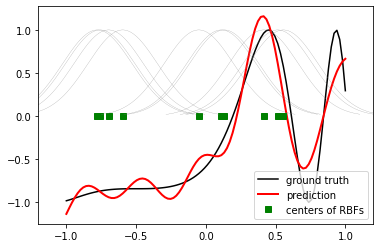

In [1]:
from scipy import * 
from scipy.linalg import norm, pinv 
from matplotlib import pyplot as plt 
import numpy as np 

class RBF: 
  def __init__(self, indim, numCenters, outdim):
    self.indim = indim; self.outdim = outdim; self.numCenters = numCenters 
    self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)] # 군집 센터는 무작위
    self.beta = 8 # 베타 
    self.W= random.random((self.numCenters, self.outdim)) 

  def basisFunc(self, c, d):
    assert len(d) == self.indim
    return np.exp(-self.beta * norm(c-d)**2) # 주어진 값에 따라 계산

  def activationFunc(self, X): # 입력이 주어졌을 때 출력
    G = np.zeros((X.shape[0], self.numCenters), float) 
    for ci, c in enumerate(self.centers): 
      for xi, x in enumerate(X):
        G[xi,ci] = self.basisFunc(c, x) # 베이시스함수 호출
    return G

  def train(self, X, Y): # 가중치만 학습
    rnd_idx = random.permutation(X.shape[0])[:self.numCenters] # 순열
    self.centers = [X[i,:] for i in rnd_idx]  # 센터
    G = self.activationFunc(X) # 액티베이션 함수 호출
    self.W = np.dot(pinv(G), Y) # 역행렬 사용
    
  def predict(self, X): # 모델에서 입력 X가 주어질 때 출력 예측
    G = self.activationFunc(X) 
    Y = np.dot(G, self.W) 
    return Y

n = 100 # 데이터 100개
x = mgrid [-1:1:complex(0,n)].reshape(n, 1) # 입력 -1~1 범위 값을 가짐
y = np.sin(3*(x+0.5)**3 - 1) # 사인함수 사용

rbf = RBF(1, 10, 1) # RBF 함수
rbf.train(x, y)  # 학습
z = rbf.predict(x) # 예측값

plt.figure(figsize=(6, 4)) # 사이즈
plt.plot(x, y, 'k-',label='ground truth') 
plt.plot(x, z, 'r-', linewidth=2, label='prediction') 
plt.plot(rbf.centers, np.zeros(rbf.numCenters), 'gs', label='centers of RBFs')

for c in rbf.centers: # 군집 중삼
  cx = np.arange(c-0.7, c+0.7, 0.01) 
  cy = [rbf.basisFunc(np.array([cx_]), np.array([c])) for cx_ in cx] 
  plt.plot(cx, cy, '-', color='gray', linewidth=0.2)

plt.xlim(-1.2, 1.2) 
plt.legend() 
plt.show()
